<a href="https://colab.research.google.com/github/Saad7912/Helmet-Detection-YOLOv8/blob/main/Helmet_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle



In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d brendan45774/bike-helmets-detection

Dataset URL: https://www.kaggle.com/datasets/brendan45774/bike-helmets-detection
License(s): CC0-1.0
 99% 387M/391M [00:14<00:00, 24.8MB/s]
100% 391M/391M [00:14<00:00, 28.1MB/s]


In [ ]:
import os
import xml.etree.ElementTree as ET

In [ ]:
from zipfile import ZipFile

In [ ]:
!ls


 bike-helmets-detection.zip   data.yaml  'kaggle .json'   Vedio.mp4
 BikesHelmets76.png	      drive	  sample_data


In [ ]:
import zipfile
import os

# Assuming the uploaded file is named 'Bike_Helmet.zip'
archive_path = '/content/bike-helmets-detection.zip'


# Extract files

with zipfile.ZipFile(archive_path, 'r') as zip_ref:
    zip_ref.extractall()
print('The dataset is extracted')



The dataset is extracted


In [ ]:
import os
import xml.etree.ElementTree as ET


In [ ]:
def convert_to_yolo_format(size, box):
    dw = 1. / size[0]
    dh = 1. / size[1]
    x = (box[0] + box[1]) / 2.0 - 1
    y = (box[2] + box[3]) / 2.0 - 1
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return (x, y, w, h)



def convert_annotation(xml_file, image_dir):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    size = root.find('size')
    w = int(size.find('width').text)
    h = int(size.find('height').text)

    image_filename = os.path.splitext(os.path.basename(xml_file))[0] + '.png'
    output_path = os.path.join(image_dir, os.path.splitext(os.path.basename(xml_file))[0] + '.txt')

    with open(output_path, 'w') as out_file:
        for obj in root.iter('object'):
            difficult = obj.find('difficult').text
            cls = obj.find('name').text
            if cls == "With Helmet" or cls == "Without Helmet" and int(difficult) == 0:
                cls_id = 0 if cls == "With Helmet" else 1
                xmlbox = obj.find('bndbox')
                b = (float(xmlbox.find('xmin').text), float(xmlbox.find('xmax').text),
                     float(xmlbox.find('ymin').text), float(xmlbox.find('ymax').text))
                bb = convert_to_yolo_format((w, h), b)
                out_file.write(f"{cls_id} " + " ".join([str(a) for a in bb]) + '\n')




def convert_all_annotations(xml_dir, image_dir):
    for xml_file in os.listdir(xml_dir):
        if xml_file.endswith('.xml'):
            convert_annotation(os.path.join(xml_dir, xml_file), image_dir)


In [ ]:
xml_dir = '/content/annotations'
image_dir = '/content/images'
convert_all_annotations(xml_dir, image_dir)

In [ ]:
import os
import shutil
import random

In [ ]:
base_path = '/content'
images_path = os.path.join(base_path, 'images')
annotations_path = os.path.join(base_path, 'annotations')

In [ ]:
train_images_path = os.path.join(base_path, 'images/train')
val_images_path = os.path.join(base_path, 'images/val')
train_labels_path = os.path.join(base_path, 'labels/train')
val_labels_path = os.path.join(base_path, 'labels/val')




# Create directories
os.makedirs(train_images_path, exist_ok=True)
os.makedirs(val_images_path, exist_ok=True)
os.makedirs(train_labels_path, exist_ok=True)
os.makedirs(val_labels_path, exist_ok=True)

In [ ]:
# Get all images
images = [f for f in os.listdir(images_path) if f.endswith('.png')]
random.shuffle(images)

In [ ]:
# Define split ratio
train_ratio = 0.8
train_size = int(len(images) * train_ratio)


In [ ]:
# Split into train and val sets
train_images = images[:train_size]
val_images = images[train_size:]


In [ ]:
# Copy files to train and val directories
for img in train_images:
    src_img_path = os.path.join(images_path, img)
    dst_img_path = os.path.join(train_images_path, img)

    if not os.path.exists(dst_img_path):
        shutil.move(src_img_path, dst_img_path)

    txt_file = img.replace('.png', '.txt')
    src_txt_path = os.path.join(images_path, txt_file)
    dst_txt_path = os.path.join(train_labels_path, txt_file)

    if not os.path.exists(dst_txt_path):
        shutil.move(src_txt_path, dst_txt_path)

for img in val_images:
    src_img_path = os.path.join(images_path, img)
    dst_img_path = os.path.join(val_images_path, img)

    if not os.path.exists(dst_img_path):
        shutil.move(src_img_path, dst_img_path)

    txt_file = img.replace('.png', '.txt')
    src_txt_path = os.path.join(images_path, txt_file)
    dst_txt_path = os.path.join(val_labels_path, txt_file)

    if not os.path.exists(dst_txt_path):
        shutil.move(src_txt_path, dst_txt_path)

In [ ]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
from ultralytics import YOLO

# Initialize YOLO model
model = YOLO('yolov8n.pt')  # Use your preferred YOLOv8 model

# Define path to YAML configuration file
data_path = '/content/data.yaml'

# Train the model
model.train(data=data_path, epochs=50, imgsz=640)


100%|██████████| 6.25M/6.25M [00:00<00:00, 145MB/s]


Ultralytics YOLOv8.2.73 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

100%|██████████| 755k/755k [00:00<00:00, 31.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/labels/train... 611 images, 3 backgrounds, 15 corrupt: 100%|██████████| 611/611 [00:02<00:00, 238.29it/s]

train: WARNING ⚠️ /content/images/train/BikesHelmets103.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     408.72      81.498      71.037      83.004]
train: WARNING ⚠️ /content/images/train/BikesHelmets140.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     547.68      84.496      132.16         151]
train: WARNING ⚠️ /content/images/train/BikesHelmets205.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      263.5      42.997          85          74]
train: WARNING ⚠️ /content/images/train/BikesHelmets279.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      194.5      55.998         103         100]
train: WARNING ⚠️ /content/images/train/BikesHelmets326.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [        157      56.498          86          97]
train: WARNING ⚠️ /content/images/train/BikesHelmets343.png: ignoring corru

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/labels/val... 153 images, 0 backgrounds, 0 corrupt: 100%|██████████| 153/153 [00:00<00:00, 222.08it/s]


val: New cache created: /content/labels/val.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.63G      1.539      2.878      1.259         19        640: 100%|██████████| 38/38 [00:22<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.21s/it]

                   all        153        287    0.00537       0.77      0.293      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.31G      1.402      1.848      1.153         10        640: 100%|██████████| 38/38 [00:16<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.16it/s]

                   all        153        287      0.893      0.249       0.51      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.29G      1.401      1.693      1.154         13        640: 100%|██████████| 38/38 [00:16<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]

                   all        153        287       0.67      0.581      0.611      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.31G      1.408      1.528      1.183         26        640: 100%|██████████| 38/38 [00:17<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]

                   all        153        287      0.685      0.656      0.657      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.32G      1.388      1.451      1.169         19        640: 100%|██████████| 38/38 [00:16<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.10it/s]

                   all        153        287      0.679      0.674      0.673      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.33G      1.356      1.313      1.158         12        640: 100%|██████████| 38/38 [00:16<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]

                   all        153        287      0.628      0.693      0.658      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.31G      1.351      1.285      1.129         15        640: 100%|██████████| 38/38 [00:17<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.22it/s]

                   all        153        287      0.618      0.704      0.672      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.29G      1.323      1.146      1.116         15        640: 100%|██████████| 38/38 [00:17<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.91it/s]

                   all        153        287      0.553      0.721      0.611      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.31G      1.317      1.157      1.134          9        640: 100%|██████████| 38/38 [00:16<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        153        287      0.699      0.736      0.727      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.29G      1.309      1.103      1.147          7        640: 100%|██████████| 38/38 [00:15<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]

                   all        153        287      0.621      0.645      0.663      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.32G      1.332      1.051      1.128         18        640: 100%|██████████| 38/38 [00:16<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]

                   all        153        287       0.61      0.644       0.63      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.33G      1.304       1.04      1.134         29        640: 100%|██████████| 38/38 [00:16<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.69it/s]

                   all        153        287      0.675      0.703      0.722      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.31G      1.319      1.031      1.123         14        640: 100%|██████████| 38/38 [00:17<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]

                   all        153        287      0.693      0.737       0.74      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.33G       1.28     0.9732      1.117         13        640: 100%|██████████| 38/38 [00:16<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]

                   all        153        287       0.68      0.714      0.719      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.31G      1.266     0.9463      1.119         23        640: 100%|██████████| 38/38 [00:16<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        153        287      0.719      0.739      0.783      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.31G       1.29     0.9638      1.107          6        640: 100%|██████████| 38/38 [00:17<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]

                   all        153        287      0.698      0.752      0.755      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.31G      1.254     0.9108      1.091         13        640: 100%|██████████| 38/38 [00:16<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]

                   all        153        287      0.799      0.716      0.789      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.33G      1.255     0.9073      1.103         14        640: 100%|██████████| 38/38 [00:17<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]

                   all        153        287      0.739      0.727       0.76      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       2.3G      1.246     0.9003       1.09          9        640: 100%|██████████| 38/38 [00:15<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]

                   all        153        287      0.742      0.754       0.76      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.33G      1.229     0.8938      1.097          9        640: 100%|██████████| 38/38 [00:17<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all        153        287      0.722      0.766       0.76      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.31G      1.198     0.8336      1.066          8        640: 100%|██████████| 38/38 [00:16<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        153        287      0.753      0.733      0.766      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.32G      1.201     0.8612      1.081          6        640: 100%|██████████| 38/38 [00:17<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]

                   all        153        287       0.77      0.776      0.812      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.31G      1.229     0.8245      1.084         22        640: 100%|██████████| 38/38 [00:17<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.29it/s]

                   all        153        287      0.766      0.756      0.792      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.31G      1.192        0.8      1.062         11        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.64it/s]

                   all        153        287      0.778      0.755       0.79      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.31G      1.177     0.8126      1.085         10        640: 100%|██████████| 38/38 [00:16<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all        153        287      0.801      0.808       0.82      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.33G      1.223     0.8151       1.09         32        640: 100%|██████████| 38/38 [00:16<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        153        287      0.751       0.76      0.792      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.31G        1.2     0.7824      1.083         30        640: 100%|██████████| 38/38 [00:15<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        153        287       0.75      0.776      0.791      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.33G      1.165     0.7785      1.055          7        640: 100%|██████████| 38/38 [00:15<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]

                   all        153        287       0.76      0.805      0.812      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.32G      1.178     0.7368      1.067         13        640: 100%|██████████| 38/38 [00:16<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]

                   all        153        287      0.744      0.774      0.783      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.34G      1.173     0.7364      1.065          7        640: 100%|██████████| 38/38 [00:17<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.64it/s]

                   all        153        287       0.77      0.749      0.781      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.31G      1.132     0.7348      1.061         14        640: 100%|██████████| 38/38 [00:17<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        153        287      0.734        0.8      0.793      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.33G       1.15     0.7296      1.056         10        640: 100%|██████████| 38/38 [00:16<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]

                   all        153        287      0.699      0.846      0.809      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.32G      1.139     0.7121      1.049         14        640: 100%|██████████| 38/38 [00:17<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]

                   all        153        287      0.751      0.779      0.795      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.31G       1.12     0.7057      1.042         11        640: 100%|██████████| 38/38 [00:16<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]

                   all        153        287      0.704      0.736      0.759      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       2.3G        1.1     0.6834      1.028         10        640: 100%|██████████| 38/38 [00:16<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        153        287      0.767      0.754      0.805      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       2.3G      1.117     0.6746      1.039         13        640: 100%|██████████| 38/38 [00:22<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all        153        287      0.773      0.806      0.826       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.31G      1.066     0.6453      1.017         15        640: 100%|██████████| 38/38 [00:16<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.06it/s]

                   all        153        287      0.729      0.827      0.807      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.32G      1.082     0.6465      1.023         13        640: 100%|██████████| 38/38 [00:16<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.69it/s]

                   all        153        287      0.765       0.78      0.813      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.34G      1.071     0.6433      1.027         16        640: 100%|██████████| 38/38 [00:16<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.56it/s]

                   all        153        287      0.791      0.798      0.809      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.32G      1.056       0.65      1.025         13        640: 100%|██████████| 38/38 [00:16<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.50it/s]

                   all        153        287      0.785      0.811      0.825      0.515


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.29G      1.026     0.5895       1.03          6        640: 100%|██████████| 38/38 [00:19<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.50it/s]

                   all        153        287      0.743      0.832      0.824      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.29G      1.038     0.6028      1.022          9        640: 100%|██████████| 38/38 [00:16<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.04it/s]

                   all        153        287      0.794      0.772      0.818      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.29G     0.9891     0.5504      1.001          9        640: 100%|██████████| 38/38 [00:15<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]

                   all        153        287      0.795      0.788      0.821      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.29G      1.006     0.5461      1.002          9        640: 100%|██████████| 38/38 [00:14<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]

                   all        153        287      0.792      0.821      0.824      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.29G     0.9784     0.5488     0.9876         14        640: 100%|██████████| 38/38 [00:15<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all        153        287      0.808      0.788      0.825      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.31G     0.9485     0.5238     0.9905          7        640: 100%|██████████| 38/38 [00:17<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]

                   all        153        287      0.804      0.835      0.833      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.29G     0.9422     0.5304     0.9867          6        640: 100%|██████████| 38/38 [00:16<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all        153        287      0.818      0.819      0.826      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.29G     0.9542     0.5009     0.9823          6        640: 100%|██████████| 38/38 [00:16<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        153        287      0.812      0.824      0.821      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       2.3G     0.9386     0.5038     0.9901         10        640: 100%|██████████| 38/38 [00:16<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.73it/s]

                   all        153        287      0.812      0.813      0.826      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.29G     0.9508     0.5054     0.9803          9        640: 100%|██████████| 38/38 [00:16<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.51it/s]

                   all        153        287      0.793      0.819      0.828      0.517



50 epochs completed in 0.298 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.73 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.08it/s]


                   all        153        287      0.804      0.835      0.833      0.522
           With Helmet        121        199      0.825       0.91      0.908      0.606
        Without Helmet         45         88      0.783      0.761      0.758      0.438
Speed: 0.2ms preprocess, 5.6ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78473b553250>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
model.save('/content/drive/MyDrive/yolov8_helmet_detection.pt')

In [ ]:
import cv2
from ultralytics import YOLO

In [ ]:
# Load the trained YOLOv8 model
model = YOLO('/content/drive/MyDrive/yolov8_helmet_detection.pt')

In [ ]:
from google.colab.patches import cv2_imshow

def detect_helmet_in_image(image_path, model):
    # Load image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image at {image_path}")
        return

    # Predict using YOLO
    results = model.predict(img)

    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cls = int(box.cls[0].item())  # Get the class index
            confidence = box.conf[0].item()

            # Get label from class index
            label = model.names[cls]

            if label == 'With Helmet':
                color = (0, 255, 0)  # Green for With Helmet
            else:
                color = (0, 0, 255)  # Red for Without Helmet

            cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
            cv2.putText(img, f"{label} {confidence:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    # Display the image with detections
    cv2_imshow(img)









0: 416x640 2 With Helmets, 5 Without Helmets, 125.9ms
Speed: 2.9ms preprocess, 125.9ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 640)


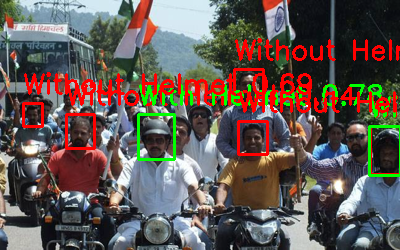

In [ ]:
# # For an image
image_path = '/content/BikesHelmets76.png'
detect_helmet_in_image(image_path, model)



In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload your video file

video_path = 'vedio2.mp4'  # Make sure the uploaded file is named Vedio.mp4


In [ ]:
import cv2
from ultralytics import YOLO

# Load the YOLO model
model_path = '/content/drive/MyDrive/yolov8_helmet_detection.pt'
model = YOLO(model_path)

def process_video(video_path, output_path, model):
    cap = cv2.VideoCapture(video_path)
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_path, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))  # Adjust frame size and FPS as needed

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Predict using YOLO
        results = model.predict(frame)

        for result in results:
            for box in result.boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                cls = int(box.cls[0].item())  # Get the class index
                confidence = box.conf[0].item()

                # Get label from class index
                label = model.names[cls]

                if label == 'With Helmet':
                    color = (0, 255, 0)  # Green for With Helmet
                else:
                    color = (0, 0, 255)  # Red for Without Helmet

                cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
                cv2.putText(frame, f"{label} {confidence:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

        out.write(frame)

    cap.release()
    out.release()
    cv2.destroyAllWindows()


output_path = '/content/output_video2.avi'
process_video(video_path, output_path, model)


In [ ]:
from google.colab import files
files.download('/content/output_video2.avi')
